# Setup

In [1]:
%matplotlib inline
# Plot everything as SVG
%config InlineBackend.figure_formats=['svg']


import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from functools import partial
np.random.seed(1)

# So we can import implementations
import sys
sys.path.append('../imps')

# for fixing matplotlib's svg clipping
from lxml import etree

# for 3d plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# for shapes
from matplotlib.path import Path
import matplotlib.patches as patches

from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist, squareform, cdist
from numpy.random import RandomState

# misc imports for examples
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_moons, make_classification

# Config styling
#palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
muted = '#dcdce6'
sns.set(font='Calibre', font_scale=1.1, style='darkgrid', palette=palette, context='talk')

# A sans-serif math font fits better, but the spacing for `stixsans` is weird
plt.rcParams['mathtext.fontset'] = 'stixsans'

# Useful functions
def plot_function(func, title=None, x=[-6,6], n=1000, origin_axis=True, discrete=False, ylim=[-1.1,1.1], label=None, ax=plt, color=None, zorder=None, alpha=1.):
    x = np.linspace(x[0],x[1],n)
    y = func(x)

    if origin_axis:
        ax.axhline(y=0, color=muted, linewidth=2, zorder=1)
        ax.axvline(x=0, color=muted, linewidth=2, zorder=1)
    
    kwargs = {
        'label': label,
        'zorder': 5,
        'alpha': alpha
    }
    if color is not None:
        kwargs['color'] = color
    if zorder is not None:
        kwargs['zorder'] = zorder
    
    if discrete:
        ax.plot(x,y,'o', **kwargs)
    else:
        ax.plot(x,y, **kwargs)
    
    if ax == plt:
        ax.ylim(*ylim)
        if title is not None:
            ax.title(title)
    else:
        ax.set_ylim(*ylim)
        if title is not None:
            ax.set_title(title)
            
def plot_vectors(vecs, ax=plt, **kwargs):
    # vecs should be a list of vectors,
    # each represented as [x1,y1,x2,y2]
    X,Y,U,V = zip(*vecs)
    defaults = {
        'angles': 'xy',
        'scale_units': 'xy',
        'scale': 1,
        'width': 0.003,
        'headlength': 2,
        'headaxislength': 2,
        'headwidth': 4,
        'color': palette
    }
    defaults.update(kwargs)
    return ax.quiver(X, Y, U, V, **defaults)


def gen_data(func, x=[-6,6], n=1000, noise_std=1):
    prng = RandomState(1)
    x = np.linspace(x[0],x[1],n)
    y = func(x) + prng.normal(0, noise_std, x.shape)
    return x, y
    
def save(name):
    fname = '../notes/assets/{}.svg'.format(name)
    plt.savefig(fname)
    
    # edit the resulting svg to fix clipping issues
    # see <https://github.com/matplotlib/matplotlib/issues/2277>
    with open(fname, 'r') as f:
        raw = f.read()
    svg = etree.fromstring(raw.encode('utf-8'))
    
    # the last <defs> tag contains the clipping info
    defs = [c for c in svg.getchildren() if c.tag == '{http://www.w3.org/2000/svg}defs'][-1]
    
    # move it to the beginning
    svg.insert(0, defs)
    
    # re-write the svg
    with open(fname, 'w') as f:
        raw = etree.tostring(svg, pretty_print=True).decode('utf-8')
        f.write(raw)

In [ ]:
# Examine available fonts
from matplotlib import font_manager
font_paths = font_manager.findSystemFonts()
font_objects = font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)

- `style` options: `dark`, `darkgrid`, `white`, `whitegrid`, `ticks`
    - for `white`/`whitegrid`/`ticks`, call `sns.despine()` after plotting
- `palette` options: `bright`, `spring`, `rainbow`, `cool`, `gnuplot2`
    - for matplotlib palettes, see: http://matplotlib.org/users/colormaps.html
    - for seaborn palettes, see: https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.color_palette.html#seaborn.color_palette
    
Additional references:
- https://web.stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html
- https://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
- `matplotlib` color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

# Testing

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
    plt.title('This is a Test $f(x)$')
    plt.xlabel('x-label')
    plt.ylabel('y-label')
sinplot()
#sns.despine

In [ ]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [ ]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

# Graphics

In [ ]:
plot_function(np.tanh, 'tanh')
save('tanh')

In [ ]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
plot_function(sigmoid, 'sigmoid', ylim=[-0.1, 1.1])
save('sigmoid')

In [ ]:
x = np.random.binomial(10,0.5,10000)
p = sns.distplot(x, kde=False, bins=10, hist_kws={'alpha':1, 'linewidth': 2, 'edgecolor': '#EAEAF2'})
p.set(yticklabels=[], xticklabels=[])
save('binomial')
plt.show()

In [ ]:
def relu(x):
    return np.maximum(np.zeros(x.shape), x)
plot_function(relu, 'ReLU', ylim=[-0.1, 1.1], x=[-2,2], n=2000)
save('relu')

In [ ]:
def step(x):
    y = x.copy()
    y[np.where(y > 0)] = 1
    y[np.where(y <= 0)] = 0
    return y
plot_function(step, 'step', ylim=[-0.1, 1.1], x=[-10,10], n=2000)
save('step')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 # sphere function
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(-20, 50)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('$z = x^2+y^2$')
#ax.set_zlabel(r'$J(\theta_1, \theta_2)$')
#ax.set_xlabel(r'$\theta_0$')
#ax.set_ylabel(r'$\theta_1$')
save('costfunc')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 # sphere function
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(10, 60)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('$z = x^2+y^2$')
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fig.set_size_inches(6,6)
save('spherefunc')

In [ ]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2
# plt.contour for lines, plt.contourf for filled
CS = plt.contourf(X, Y, Z, 32,
                        cmap=plt.cm.rainbow,
                        origin='lower')
CS2 = plt.contour(X, Y, Z, 32,
                        cmap=plt.cm.rainbow,
                        origin='lower')
plt.colorbar(CS)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title(r'$J(\theta_1, \theta_2)$')
save('costfunccontour')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 - Y**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(-20, 50)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.plot([0], [0], [0], c='r', marker='o', label='saddlepoint')
leg = ax.legend()
leg.legendHandles[0].set_linewidth(1.)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('$x^2 - y^2$')
save('saddlepoint')

In [ ]:
p = plot_function(lambda x: 1/x, 'Error', ylim=[-0.1, 2], x=[0.01, 10])
plt.xlabel('# iterations')
plt.ylabel(r'$J(\theta)$')
plt.yticks([])
plt.xticks([])
save('decreasing_error')

In [ ]:
fig, axs = plt.subplots(1,2)
x = np.random.poisson(1.5,10000000)
binwidth=1
p = sns.distplot(x, kde=False, bins=range(min(x), max(x) + binwidth, binwidth), norm_hist=True, hist_kws={'alpha':1, 'linewidth': 2, 'edgecolor': '#EAEAF2'}, label=r'$\lambda = 1.5$', ax=axs[0])
x = np.random.poisson(4.0,10000000)
p = sns.distplot(x, kde=False, bins=range(min(x), max(x) + binwidth, binwidth), norm_hist=True, hist_kws={'alpha':1, 'linewidth': 2, 'edgecolor': '#EAEAF2'}, label=r'$\lambda = 4.0$', ax=axs[1], color=palette[1])

for ax in axs:
    ax.legend()
    ax.set(xlabel='$k$', xlim=[0,10], ylim=[0,0.35])    
axs[0].set_ylabel('probability of $k$')
fig.set_size_inches(8,4)
save('poisson')

In [ ]:
plot_function(scipy.stats.norm.pdf, 'Normal Distribution PDF', ylim=[-0.01, 0.5])
save('pdf')

In [ ]:
fig, ax = plt.subplots(1)
plot_function(scipy.stats.norm.cdf, 'Normal Distribution CDF', ylim=[-0.01, 1.01], ax=ax)
ax.set_ylabel('Cumulative probability')
fig.set_size_inches(8, 5)
save('cdf')

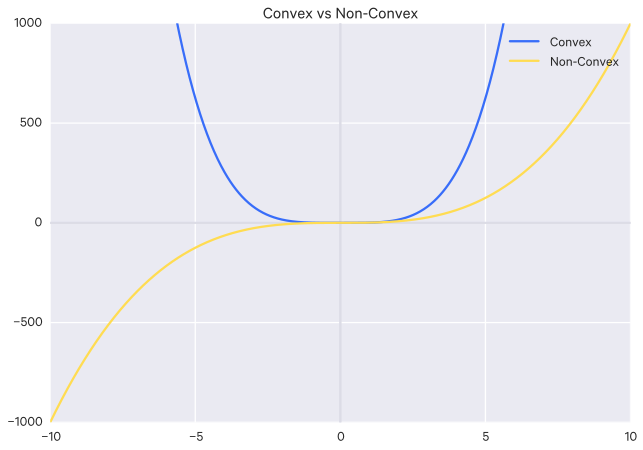

In [9]:
def convex(x):
    return x**4

def non_convex(x):
    return x**3

for f, label in [(convex, 'Convex'), (non_convex, 'Non-Convex')]:
    plot_function(f, 'Convex vs Non-Convex', ylim=[-1000, 1000], x=[-10,10], label=label)
plt.legend()
save('convex_nonconvex')

In [ ]:
plot_function(scipy.stats.norm.cdf, 'Normal Distribution CDF', ylim=[-0.01, 1.01])

# Fill area up to x=2
x = np.linspace(-6,2,10000)
y = scipy.stats.norm.cdf(x)
plt.fill_between(x, 0, y, facecolor='#FFDC52', zorder=2, linewidth=0)
plt.axvline(x=2, color='#FF1614', linewidth=2)

plt.ylabel('Cumulative probability')
save('cdf_area')

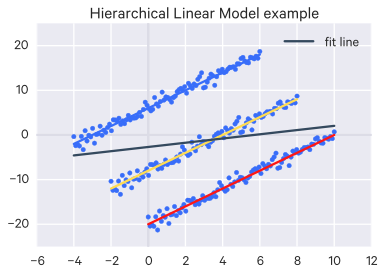

In [6]:
fig, ax = plt.subplots(1)
lines = [
    lambda x: 2*x + 6,
    lambda x: 2*x - 8,
    lambda x: 2*x - 20
]
colors = [
    '#386df9',
    '#ffdc52',
    '#ff1614'
]
xrngs = [
    [-4, 6],
    [-2, 8],
    [0, 10]
]

all_xs = []
all_ys = []
for l, c, xrng in zip(lines, colors, xrngs):
    xs, ys = gen_data(l, n=100, x=xrng)
    ax.scatter(xs, ys, color='#386DF9', zorder=2)
    plot_function(l, 'Hierarchical Linear Model example', x=xrng, ax=ax)
    all_xs.append(xs)
    all_ys.append(ys)

X = np.hstack(all_xs)
X = X[:,np.newaxis]
Y = np.hstack(all_ys)

m = LinearRegression()
m.fit(X,Y)
x = np.linspace(-4,10,100)
x = x[:,np.newaxis]
y = m.predict(x)
ax.plot(x,y,label='fit line', zorder=10, color='#34495E')
ax.legend()
ax.set_ylim([-25,25])
fig.set_size_inches(6,4)

save('hlm_01')

In [ ]:
fig, axs = plt.subplots(1,3)

lines = [
    lambda x: 4*x + 4,
    lambda x: 4*x - 2,
    lambda x: 4*x - 8
]
for l in lines:
    plot_function(l, 'Varying intercepts', x=[0,4], ax=axs[0])

lines = [
    lambda x: 4*x - 10,
    lambda x: 6*x - 10,
    lambda x: 8*x - 10
]
for l in lines:
    plot_function(l, 'Varying slopes', x=[0,4], ax=axs[1])

lines = [
    lambda x: 4*x + 4,
    lambda x: 6*x - 2,
    lambda x: 8*x - 10
]
for l in lines:
    plot_function(l, 'Varying slopes and intercepts', x=[0,4], ax=axs[2])
    
for ax in axs:
    ax.set_ylim([-10,24])
    ax.set_xlim([0,6])

fig.set_size_inches(12, 4)
save('hlm_02')

In [ ]:
def step(x):
    y = x.copy()
    y[np.where((y > 0) & (y <= 1))] = 0.25
    y[np.where((y > 1) & (y <= 2))] = 0.75
    y[np.where((y > 2) & (y <= 3))] = 1
    y[np.where(y <= 0)] = 0
    return y

plot_function(step, 'Discrete CDF', ylim=[-0.1, 1.1], x=[-1,3], n=2000)
save('discrete_cdf')

In [ ]:
for sigma in [1, 1.5, 0.75]:
    norm = partial(scipy.stats.norm.pdf, scale=sigma)
    plot_function(norm, 'Normal (Gaussian) Distribution PDF', ylim=[-0.01, 0.5], label=r'$\sigma={}$'.format(sigma))

plt.ylim([-0.01, 0.6])
plt.legend()
save('gaussian')

In [ ]:
def nonconvex(x):
    return x**2 + 10*np.sin(x)
plot_function(nonconvex, 'Non-convex function', ylim=[-20, 60], n=2000, x=[-10,10])
save('nonconvex')

In [ ]:
fig, axs = plt.subplots(1,3)

dist = partial(scipy.stats.lognorm.pdf, s=0.5, loc=0)
plot_function(dist, 'Mean', x=[0,4], ylim=[-0.01, 1], ax=axs[0])
mean = scipy.stats.lognorm.mean(s=0.5, loc=0)
axs[0].axvline(x=mean, color='#FF1614', linewidth=2, zorder=10)

plot_function(dist, 'Median', x=[0,4], ylim=[-0.01, 1], ax=axs[1])
median = scipy.stats.lognorm.median(s=0.5, loc=0)
axs[1].axvline(x=median, color='#FF1614', linewidth=2, zorder=10)
x = np.linspace(0,1,1000)
y = scipy.stats.lognorm.pdf(x, s=0.5)
axs[1].fill_between(x, 0, y, facecolor='#FFDC52', zorder=2, linewidth=0)
x = np.linspace(1,4,1000)
y = scipy.stats.lognorm.pdf(x, s=0.5)
axs[1].fill_between(x, 0, y, facecolor='#62F591', zorder=2, linewidth=0)
axs[1].text(0.5, 0.2, '50%')
axs[1].text(1.2, 0.2, '50%')

plot_function(dist, 'Mode', x=[0,4], ylim=[-0.01, 1], ax=axs[2])
axs[2].axvline(x=0.78, color='#FF1614', linewidth=2, zorder=10)

fig.set_size_inches(12, 4)
save('central_tendencies')

In [ ]:
fig, ax = plt.subplots(1)
vecs = np.array([[0,0,5,0]])
plot_vectors(vecs, color=palette, ax=ax, width=0.01)
ax.set_xlim([-1,6])
ax.set_ylim([-1,2])
fig.set_size_inches(3,3)
save('vector')

In [ ]:
fig, ax = plt.subplots(1)
vecs = np.array([[0,0,6,3], [0,0,2,1]]) 
plot_vectors(vecs, color=['#386DF9', '#FF1614'], ax=ax, width=0.01)
ax.set_xlim([-1,8])
ax.set_ylim([-1,4])
fig.set_size_inches(3,3)
save('scaled_vector')

In [ ]:
def ricker(x):
    y = (1.0 - 2.0*(np.pi**2)*(x**2)) * np.exp(-(np.pi**2)*(x**2))
    return y

fig, ax = plt.subplots(1)
plot_function(ricker, 'The Ricker Wavelet', x=[-3,3], ylim=[-0.55, 1.1], label=r'$\phi = (1-r^2) \cdot e^{-\frac{r^2}{2}}$', ax=ax)
ax.legend()
fig.set_size_inches(10, 4)
           
save('ricker_rbf')

In [ ]:
def gauss(x):
    return np.exp(-(x**2))

fig, ax = plt.subplots(1)
plot_function(gauss, '1D Gaussian RBF', x=[-3,3], ylim=[-0.55, 1.1], label=r'$\phi = e^{-r^2}$', ax=ax)
ax.legend()
fig.set_size_inches(10, 4)
save('gaussian_rbf')

In [ ]:
fig, ax = plt.subplots(1)
vecs = np.array([[0,0,4,4], [0,0,2,2], [0,0,-4,-4], [0,0,-2,-2]]) 
plot_vectors(vecs, color=[palette[0], palette[1], palette[2], palette[-1]], zorder=2, ax=ax, width=0.004)
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
ax.axhline(y=0, color=muted, linewidth=2, zorder=1)
ax.axvline(x=0, color=muted, linewidth=2, zorder=1)
save('vector_line')

In [ ]:
fig, ax = plt.subplots(1)
plot_function(lambda x: x**3, 'Inflection example', x=[-1.5, 1.5], ylim=[-1.1, 1.1], label=r'$x^3$', ax=ax)
fig.set_size_inches(8,4)
ax.legend()
save('inflection')

In [ ]:
def convex(x):
    return x**2
plot_function(convex, 'Convex function', ylim=[-20, 60], n=2000, x=[-10,10])
save('convex')

In [ ]:
for lm in [1, 0.6]:
    expon = partial(scipy.stats.expon.pdf, scale=lm)
    plot_function(expon, 'Exponential Distribution PDF', ylim=[-0.01, 0.5], x=[0, 5], label=r'$\lambda={}$'.format(lm))
plt.ylim([-0.01, 1])
plt.legend()
save('exponential')

In [ ]:
x = np.random.normal(0,1,100)
sns.distplot(x, kde=True, rug=True, hist=False, kde_kws={'bw': 1}, label='bandwidth=1')
sns.distplot(x, kde=True, rug=False, hist=False, kde_kws={'bw': 0.5}, label='bandwidth=0.5')
sns.distplot(x, kde=True, rug=False, hist=False, kde_kws={'bw': 0.15}, label='bandwidth=0.15')
plt.ylabel('Density')
plt.title('KDE with various bandwidths')
save('kde_bandwidth')

In [ ]:
x = np.random.normal(0, 1, size=10)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-6, 6, 200)

kernels = []
for x_i in x:
    kernel = scipy.stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='#34495E', alpha=0.1)

sns.rugplot(x, color="#34495E", linewidth=3);
sns.kdeplot(x, bw=bandwidth)
plt.ylabel('Density')
plt.title('KDE with kernels')
plt.text(2, 0.6, 'Kernel functions for each point')
plt.text(1.4, 0.2, 'Kernel density estimate')
save('kde')

In [ ]:
fig, axs = plt.subplots(1,3)
data, _ = make_blobs(n_samples=100, centers=1, cluster_std=2.)
sns.kdeplot(data[:,0], data[:,1], shade=True, shade_lowest=False, cmap='rainbow', bw=2, linewidth=0.1, alpha=0.4, ax=axs[0])
axs[0].scatter(data[:,0], data[:,1], color='#386DF9', zorder=2)

data, _ = make_blobs(n_samples=100, centers=1, cluster_std=1.)
sns.kdeplot(data[:,0], data[:,1], shade=True, shade_lowest=False, cmap='rainbow', bw=2, linewidth=0.1, alpha=0.4, ax=axs[1])
axs[1].scatter(data[:,0], data[:,1], color='#386DF9', zorder=2)

line_1 = lambda x: 6*x + 4
x_1, y_1 = gen_data(line_1, n=100, x=[-4,6], noise_std=4)
axs[2].scatter(x_1,y_1, color='#386DF9', zorder=2)
fig.set_size_inches(12, 4)

#plt.suptitle('Examples of Gaussians')
save('gaussians')

In [ ]:
fig, axs = plt.subplots(1,3)
data, _ = make_moons(n_samples=100, noise=0.05)
axs[0].scatter(data[:,0], data[:,1], color='#FF1614', zorder=2)

data, _ = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2)
axs[1].scatter(data[:,0], data[:,1], color='#FF1614', zorder=2)

data, _ = make_blobs(n_samples=100, centers=2, cluster_std=2.)
axs[2].scatter(data[:,0], data[:,1], color='#FF1614', zorder=2)

fig.set_size_inches(12,4)

#plt.suptitle('Examples of non-Gaussians')
save('non_gaussians')

In [ ]:
for df in [1,4,8]:
    cs = partial(scipy.stats.chi2.pdf, df=df)
    plot_function(cs, 'Chi-squared Distribution PDF', ylim=[-0.01, 0.5], x=[0, 16], label=r'$k={}$'.format(df))
plt.ylim([-0.01, 1])
plt.legend()
plt.ylabel('Density')
save('chisquare')

In [ ]:
X,Y = np.meshgrid(np.arange(0,2*np.pi,.2),np.arange(0,2*np.pi,.2))
U = np.cos(X)
V = np.sin(Y)

#1

Q = plt.quiver(U, V)
l,r,b,t = plt.axis()
dx, dy = r-l, t-b
plt.axis([l-0.05*dx, r+0.05*dx, b-0.05*dy, t+0.05*dy])
plt.ylim([-1, 32])
plt.xlim([-1, 32])
save('vector_field')

In [ ]:
fig, axs = plt.subplots(4,2)
axs = axs.ravel()

x1 = np.random.binomial(10,0.6,10000)
x2 = np.random.binomial(15,0.8,1000)
x3 = np.random.binomial(15,0.1,5000)
p = sns.kdeplot(np.hstack([x1,x2,x3]), bw=0.6, ax=axs[0])
axs[0].set_title('Unimodal')

x1 = np.random.binomial(10,0.2,10000)
x2 = np.random.binomial(10,0.7,10000)
sns.kdeplot(np.hstack([x1,x2]), bw=0.6, ax=axs[1])
axs[1].set_title('Bimodal')

x1 = np.random.binomial(10,0.6,10000)
x2 = np.random.binomial(15,0.8,10000)
x3 = np.random.binomial(15,0.1,10000)
p = sns.kdeplot(np.hstack([x1,x2,x3]), bw=0.6, ax=axs[2])
axs[2].set_title('Multimodal')

n1 = partial(scipy.stats.norm.pdf, scale=1)
plot_function(n1, 'Symmetrical', ylim=[-0.01, 0.5], ax=axs[3], origin_axis=False)

dist = partial(scipy.stats.lognorm.pdf, s=0.5, loc=0)
plot_function(dist, 'Positive Skew (Right Skewed)', x=[0,4], ylim=[-0.01, 1], ax=axs[4], origin_axis=False)

x = np.random.binomial(10,0.95,10000)
sns.kdeplot(x, bw=0.6, ax=axs[5])
axs[5].set(title='Negative Skew (Left Skewed)', ylim=[-0.005, 0.5])

n1 = partial(scipy.stats.beta.pdf, a=2, b=2)
plot_function(n1, 'Negative (Light-Tailed) Kurtosis', ylim=[-0.01, 2], x=[0,1], ax=axs[6], origin_axis=False)

n1 = partial(scipy.stats.t.pdf, df=4)
plot_function(n1, 'Positive (Heavy-Tailed) Kurtosis', ylim=[0, 0.5], x=[-3,3], ax=axs[7], origin_axis=False)

for ax in axs:
    ax.set(yticklabels=[], xticklabels=[])
    ax.grid(False)
    
fig.set_size_inches(10,14)
    
save('distribution_patterns')

In [ ]:
fig, axs = plt.subplots(1,2)
line_1 = lambda x: 6*x + 4
x_1, y_1 = gen_data(line_1, n=100, x=[-4,6], noise_std=4)
axs[0].scatter(x_1,y_1, color='#386DF9', zorder=2)
axs[0].set_title('Before PCA')
X = np.vstack([x_1, y_1])

pca = PCA(n_components=1)
X = pca.fit_transform(X.T)
y = np.zeros(X.shape)
axs[1].scatter(X,y, color='#386DF9', zorder=2)
axs[1].set_title('After PCA')

for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])

fig.set_size_inches(12, 4)
save('pca_example')

In [ ]:
n1 = partial(scipy.stats.norm.pdf, scale=1)
plot_function(n1, 'Normal', ylim=[-0.01, 0.5], x=[-4,4])
#ticks = [i for i in plt.xticks()[0]]
plt.xticks([-3,-2,-1,0,1,2,3], [r'$-3\sigma$', r'$-2\sigma$', r'$-1\sigma$', r'$\bar x$', r'$1\sigma$', r'$2\sigma$', r'$3\sigma$'])
x = np.linspace(-1,1,10000)
y = scipy.stats.norm.pdf(x)
plt.fill_between(x, 0, y, facecolor='#FFDC52', zorder=4, linewidth=0, alpha=0.45)
x = np.linspace(-2,2,10000)
y = scipy.stats.norm.pdf(x)
plt.fill_between(x, 0, y, facecolor='#FFDC52', zorder=3, linewidth=0, alpha=0.4)
x = np.linspace(-3,3,10000)
y = scipy.stats.norm.pdf(x)
plt.fill_between(x, 0, y, facecolor='#FFDC52', zorder=2, linewidth=0, alpha=0.25)
#plt.axvline(x=2, color='#FF1614', linewidth=2)
plt.title('The Empirical Rule')

plt.annotate(' ', xy=(-1,0), xytext=(1, 0), xycoords='data',  textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="bar",
                            ec="k",), zorder=10
            )
plt.text(0, 0.06, '68%', ha='center', zorder=10)

plt.annotate(' ', xy=(-2,0), xytext=(2, 0), xycoords='data',  textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="bar,fraction=0.25",
                            ec="k",), zorder=10
            )
plt.text(0, 0.095, '95%', ha='center', zorder=10)

plt.annotate(' ', xy=(-3,0), xytext=(3, 0), xycoords='data',  textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="bar,fraction=0.25",
                            ec="k",), zorder=10
            )
plt.text(0, 0.142, '99.7%', ha='center', zorder=10)
save('empirical_rule')

In [ ]:
line_1 = lambda x: 6*x + 4
X, Y = gen_data(line_1, n=10, x=[-4,6], noise_std=6)
X, Y = X[:,np.newaxis],Y[:,np.newaxis]
plt.scatter(X, Y, zorder=2, color=palette[0], s=48)

m = LinearRegression()
m.fit(X,Y)
X_line = np.linspace(-4,6,100)
X_line = X_line[:,np.newaxis]
Y_line = m.predict(X_line)
plt.plot(X_line, Y_line, zorder=2, color='#C1C1C1')

Y_pred = m.predict(X)
for i, (x, y, y_pred) in enumerate(zip(X[:,0], Y[:,0], Y_pred[:,0])):
    plt.plot([x, x], [y, y_pred], color='#FF1614', linestyle='-', linewidth=1, zorder=1, label="Error" if i==0 else None)
    
plt.legend()
save('error')

In [ ]:
fig, axs = plt.subplots(1,2)

line_1 = lambda x: 0.6*x + 4
X, Y = gen_data(line_1, n=40, x=[-4,6], noise_std=2)
X, Y = X[:,np.newaxis],Y[:,np.newaxis]
axs[0].scatter(X, Y, zorder=2, color=palette[0], linewidth=0)
axs[1].scatter(X, Y, zorder=2, color=palette[0], linewidth=0)

m = LinearRegression()
m.fit(X,Y)
X_line = np.linspace(-20,20,100)
X_line = X_line[:,np.newaxis]
Y_line = m.predict(X_line)
axs[0].plot(X_line, Y_line, zorder=2, color='#C1C1C1')

m_1 = m.coef_[0][0]
b_1 = m.intercept_[0]
m_2 = (-1/m_1)

for i, (x, y) in enumerate(zip(X[:,0], Y[:,0])):
    b_2 = y - m_2*x
    
    x_ = (m_1 * (b_2 -  b_1))/(m_1**2 + 1)
    y_ = m_1*x_ + b_1
    axs[0].plot([x, x_], [y, y_], color='#FF1614', linestyle='-', linewidth=1, zorder=1, label="Error" if i==0 else None)
    
mid_x = (max(X) - min(X))/2 + min(X)
mid_y = (max(Y) - min(Y))/2 + min(Y)

m_1, m_2 = m_2, m_1
b_1 = mid_y - m_1 * mid_x
Y_line = X_line * m_1 + b_1

axs[1].plot(X_line, Y_line, zorder=2, color='#C1C1C1')

for i, (x, y) in enumerate(zip(X[:,0], Y[:,0])):
    b_2 = y - m_2*x
    
    x_ = (m_1 * (b_2 -  b_1))/(m_1**2 + 1)
    y_ = m_1*x_ + b_1
    axs[1].plot([x, x_], [y, y_], color='#FF1614', linestyle='-', linewidth=1, zorder=1, label="Error" if i==0 else None)

for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylim([-15,15])
    ax.set_xlim([-15,15])

fig.set_size_inches(12, 6)

save('pca')

In [ ]:
# Various lines
xrng=[-40, 40]
ylim=[-40, 40]
l1 = lambda x: 2*x + 3
plot_function(l1, 'Lines with varying $m$ and $b$', ylim=ylim, x=xrng, label='$y=2x+3$')
l2 = lambda x: 0.75*x - 4
plot_function(l2, 'Lines with varying $m$ and $b$', ylim=ylim, x=xrng, label='$y=0.75x-4$')
l2 = lambda x: -0.5*x + 1
plot_function(l2, 'Lines with varying $m$ and $b$', ylim=ylim, x=xrng, label='$y=-0.5x+1$')
plt.legend()
save('lines')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 # sphere function
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(-20, 50)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('$m$')
ax.set_ylabel('$b$')
ax.set_zlabel('$J$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

fig.colorbar(surf, shrink=0.5, aspect=5)
save('gradient_descent_3d')

In [ ]:
fig, axs = plt.subplots(1,2)

xs = [0,1,2,3,4]
ys = [2,6,1,4,7]

axs[0].scatter(xs, ys, c=palette[0], linewidth=0, s=80)
axs[0].set_title('Discrete')

x1 = np.random.binomial(10,0.6,10000)
x2 = np.random.binomial(15,0.8,1000)
x3 = np.random.binomial(15,0.1,5000)
sns.kdeplot(np.hstack([x1,x2,x3]), bw=0.6, ax=axs[1])
axs[1].set_title('Continuous')

fig.set_size_inches(12, 4)
save('discrete_vs_continuous')

In [ ]:
def func(x):
    return x**3 - (6*x**2)+4*x+12

fig, ax = plt.subplots(1)
plot_function(func, 'Rolle\'s Theorem example', x=[-2,4], ax=ax)
ax.set_ylim([-20,20])
ax.axhline(y=13, color=palette[1], linewidth=2, zorder=1, label=r'$\frac{dx}{dy}=0$')
ax.axhline(y=2, color=palette[2], linewidth=2, zorder=1, label='$f(a) = f(b)$')
ax.axvline(x=2.2520, color=palette[5], zorder=3)
ax.axvline(x=-0.946, color=palette[5], zorder=3)
ax.legend()
fig.set_size_inches(10, 4)
save('rolles')

In [ ]:
fig, ax = plt.subplots(1)
vecs = np.array([[0,0,3,3], [0,0,1,1], [0,0,2,1]]) 
plot_vectors(vecs, ax=ax, color=[palette[0], palette[2], palette[4]], width=0.008)

ax.set_xlim([-1,4])
ax.set_ylim([-1,4])

a_label = patches.Patch(color=palette[0], label='a')
b_label = patches.Patch(color=palette[2], label='b')
c_label = patches.Patch(color=palette[4], label='c')
ax.legend(handles=[a_label, b_label, c_label], loc=2)

fig.set_size_inches(4, 4)
save('euclidean_distance')

In [ ]:
title = 'ROC Curves'
xrng = [0, 1]
fig, ax = plt.subplots(1)
plot_function(lambda x: x, title, x=xrng, label='worst', ax=ax)
plot_function(lambda x: -((x-1)**2)+1, title, x=xrng, label='better', ax=ax)
plot_function(lambda x: np.sqrt(1-(x-1)**2), title, x=xrng, label='even better', ax=ax)
ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.legend(loc=4)
fig.set_size_inches(4, 4)
save('roc_curves')

In [ ]:
fig, ax = plt.subplots(1)
ax.set(ylim=[-5,5], xlim=[-5,5], yticks=[], xticks=[])
ax.grid(False)
ax.axhline(y=0, color=muted, linewidth=2, zorder=2)
ax.axvline(x=0, color=muted, linewidth=2, zorder=2)
ax.add_patch(
    patches.Rectangle(
        (0, -5),
        5,
        10,
        hatch='///',
        label='a subspace',
        edgecolor='#2255DB'
    )
)
fig.set_size_inches(4, 4)
#ax.legend(loc=2)
save('subspace_p')

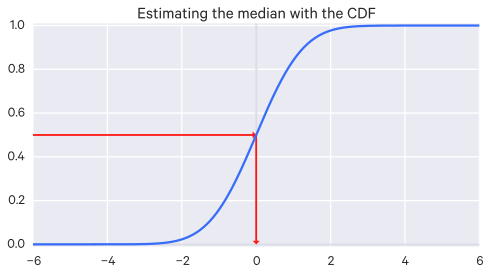

In [17]:
fig, ax = plt.subplots(1)
plot_function(scipy.stats.norm.cdf, 'Estimating the median with the CDF', ylim=[-0.01, 1.01], ax=ax)
ax.set_ylabel('Cumulative probability')
vecs = np.array([[-6,0.5,6,0], [0,0.5,0,-0.5]]) 
plot_vectors(vecs, color=palette[2], zorder=3, ax=ax, width=0.004)
fig.set_size_inches(8,4)
save('cdf_median')

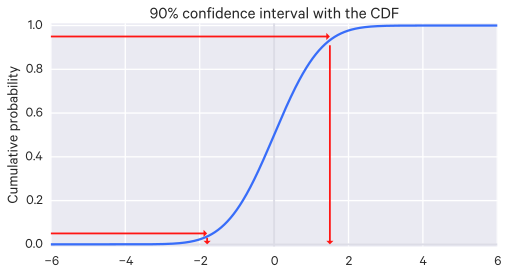

In [19]:
fig, ax = plt.subplots(1)
plot_function(scipy.stats.norm.cdf, '90% confidence interval with the CDF', ylim=[-0.01, 1.01], ax=ax)
ax.set_ylabel('Cumulative probability')
vecs = np.array([[-6,0.95,7.5,0], [1.5,0.91,0,-0.91],
                 [-6,0.05,4.2,0], [-1.8,0.03,0,-0.03]]) 
plot_vectors(vecs, color=palette[2], zorder=3, ax=ax,  width=0.004)
fig.set_size_inches(8,4)
save('cdf_confidence')

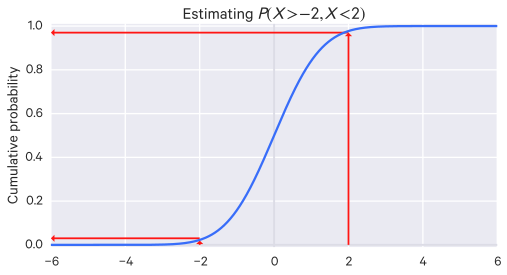

In [15]:
fig, ax = plt.subplots(1)
plot_function(scipy.stats.norm.cdf, 'Estimating $P(X > -2, X < 2)$', ylim=[-0.01, 1.01], ax=ax)
ax.set_ylabel('Cumulative probability')
vecs = np.array([[-2,0,0,0.02], [-2,0.03,-4,0],
                 [2,0,0,0.97], [2,0.97,-8,0]]) 
plot_vectors(vecs, color=palette[2], zorder=3, ax=ax, width=0.004)
fig.set_size_inches(8,4)
save('cdf_range')

In [ ]:
title = 'Support vector machine example'
ylim = [1, 15]
model = SVC(kernel='linear')
fig, ax = plt.subplots(1)
pltfnc = partial(plot_function, title=title, ylim=ylim, ax=ax, zorder=2)

data, labels = make_blobs(n_samples=100, centers=[[-2,4], [6,10]], cluster_std=1., random_state=1)
ax.scatter(data[:,0], data[:,1], color=palette[5], zorder=3)

model.fit(data, labels)
m = model.coef_[0]
b = model.intercept_

# Solve for y = m_1x_1 + m_2x_2 + b, where y=0, so we can plot this in 2D
def func(x):
    return -(m[0]*x + b)/m[1]

pltfnc(func, x=[-10,12], label='decision boundary')

svs = model.support_vectors_
slope = -(m[0]/m[1])

for i, sv in enumerate(svs):
    def func(x):
        b_ = sv[1] - slope * sv[0]
        return slope * x + b_
    lbl = 'margins' if i == 0 else None
    pltfnc(func, x=[-10,12], color=palette[2], label=lbl)
    
def func(x):
    s = -(1/slope)
    b_ = sv[1] - s * sv[0]
    return s * x + b_
pltfnc(func, x=[svs[0][0], svs[1][0]], color=palette[1])

def func(x):
    return slope*0.4*x + 8
pltfnc(func, x=[-10,12], label='suboptimal boundaries', color='#bcbcc9', zorder=1)

def func(x):
    return slope*1.4*x + 16
pltfnc(func, x=[-10,12], color='#bcbcc9')


ax.legend()
ax.set_xlim([-5,10])
ax.set_ylim([0,15])
fig.set_size_inches(8,8)
save('svm')

In [ ]:
title = 'Support vector machine example'
ylim = [1, 15]
model = SVC(kernel='linear')
fig, ax = plt.subplots(1)
pltfnc = partial(plot_function, title=title, ylim=ylim, ax=ax, zorder=2)

# Create two clusters
data, labels = make_blobs(n_samples=100, centers=[[-2,4], [6,10]], cluster_std=1., random_state=1)
ax.scatter(data[:,0], data[:,1], color=palette[5], zorder=3)

# Fit SVM model
model.fit(data, labels)
m = model.coef_[0]
b = model.intercept_

# Solve for y = m_1x_1 + m_2x_2 + b, where y=0, so we can plot this in 2D
def func(x):
    return -(m[0]*x + b)/m[1]

pltfnc(func, x=[-10,12], label='decision boundary')

svs = model.support_vectors_
slope = -(m[0]/m[1])

for sv in svs:
    def func(x):
        b_ = sv[1] - slope * sv[0]
        return slope * x + b_
    pltfnc(func, x=[-10,12], color=palette[2])
    
def func(x):
    s = -(1/slope)
    b_ = sv[1] - s * sv[0]
    return s * x + b_
pltfnc(func, x=[svs[0][0], svs[1][0]], color=palette[1], label='margins')

# w
def func(x):
    s = -(1/slope)
    return s * x
pltfnc(func, x=[-10,9], color=palette[4], label=r'$\vec w$')

# u
def func(x):
    s = -(1/slope)*4.5
    return s * x
pltfnc(func, x=[-10,2], color=palette[3], label=r'$\vec u$')

ax.legend()
ax.set_xlim([-5,10])
ax.set_ylim([0,15])
fig.set_size_inches(8,8)
save('svm_02')

In [ ]:
title = 'Computing SVM margin width'
ylim = [1, 15]
model = SVC(kernel='linear')
fig, ax = plt.subplots(1)
pltfnc = partial(plot_function, title=title, ylim=ylim, ax=ax, zorder=2)

# Create two clusters
data, labels = make_blobs(n_samples=100, centers=[[-2,4], [6,10]], cluster_std=1., random_state=1)
ax.scatter(data[:,0], data[:,1], color=palette[5], zorder=3)

# Fit SVM model
model.fit(data, labels)
m = model.coef_[0]
b = model.intercept_

# find closest point to each support vector
dists = cdist(svs, data, metric='euclidean')
dists[np.where(dists==0)] = np.inf
idx1, idx2 = np.argmin(dists, axis=1)
pt1 = data[idx1]
pt2 = data[idx2]

# Solve for y = m_1x_1 + m_2x_2 + b, where y=0, so we can plot this in 2D
def func(x):
    return -(m[0]*x + b)/m[1]
pltfnc(func, x=[-10,12], color=muted)

svs = model.support_vectors_
slope = -(m[0]/m[1])
for sv in svs:
    def func(x):
        b_ = sv[1] - slope * sv[0]
        return slope * x + b_
    pltfnc(func, x=[-10,12], color=muted)


w = [9, -(1/slope) * 9]
x_m = pt1.tolist()
x_p = pt2.tolist()
x_p_minus_x_m = (pt2-pt1).tolist()
vecs = [[0,0]+x_m, [0,0]+x_p, x_m+x_p_minus_x_m, [0,0]+w]
plot_vectors(vecs, width=0.004, zorder=10, headwidth=3, color=[palette[0], palette[1], palette[2], palette[4]])

ax.set_xlim([-5,10])
ax.set_ylim([0,15])

ax.text(x_m[0]-0.4, x_m[1]-2, r'$\vec x_-$', size=20, zorder=20)
ax.text(x_p[0]-2.3, x_p[1]-4, r'$\vec x_+$', size=20, zorder=20)
ax.text(x_p_minus_x_m[0] + x_m[0]-5, x_p_minus_x_m[1] + x_m[1] - 1.7, r'$\vec x_+ - \vec x_-$', size=20, zorder=20)
ax.text(w[0], w[1], r'$\vec w$', size=20, zorder=20)


fig.set_size_inches(8,8)
save('svm_03')

In [ ]:
def func(x):
    return (x/(math.e*(1+x)))
plot_function(func, r'$P(never)$', ylim=[0,0.4], x=[0,40], color=palette[0], zorder=2)
plt.ylabel('probability of never seeing event')
plt.xlabel('$n$')
save('pnever')

In [ ]:
verts = [
    (-.5, -.5), # left, bottom
    (-.5, 0.5), # left, top
    (.5, -.5), # right, bottom
    (-.5, -.5), # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, axs = plt.subplots(1, 2)
patch = patches.PathPatch(path, lw=2, fill=False, edgecolor=palette[0])
axs[0].add_patch(patch)


verts = [
    (-.5, -.5), # left, bottom
    (.5, 0.5), # left, top
    (.5, -.5), # right, bottom
    (-.5, -.5), # ignored
]


codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

patch = patches.PathPatch(path, lw=2, fill=False, edgecolor=palette[0])
axs[1].add_patch(patch)

for ax in axs:
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
axs[1].arrow(-2,0,1.5,0.,fc=palette[2], ec=palette[2],clip_on=False, zorder=10, width=0.01, head_length=0.05, head_width=0.08)
fig.set_size_inches(8,4)
save('reflection')

In [ ]:


verts = [
    (-.5, -.5), # left, bottom
    (-.5, 0.5), # left, top
    (.5, -.5), # right, bottom
    (-.5, -.5), # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, axs = plt.subplots(1, 2)
patch = patches.PathPatch(path, lw=2, fill=False, edgecolor=palette[0])
axs[0].add_patch(patch)


verts = [
    (-.5, -.5), # left, bottom
    (.5, 0.5), # left, top
    (.5, -.5), # right, bottom
    (-.5, -.5), # ignored
]


codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

patch = patches.PathPatch(path, lw=2, fill=False, edgecolor=palette[0])
axs[1].add_patch(patch)

for ax in axs:
    ax.set_xlim(-1,1.5)
    ax.set_ylim(-1,1.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
axs[1].arrow(-2,0,1.5,0.,fc=palette[2], ec=palette[2],clip_on=False, zorder=10, width=0.01, head_length=0.05, head_width=0.08)
fig.set_size_inches(8,4)
save('image')

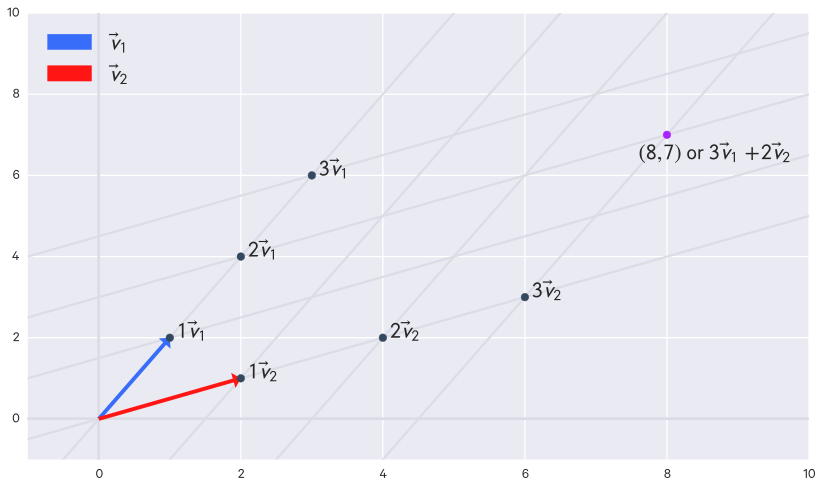

In [8]:
fig, ax = plt.subplots(1)
size=22
xrng=[-1, 10]
v1 = [1,2]
v2 = [2,1]
vecs = [[0,0]+v1, [0,0]+v2]
plot_vectors(vecs, ax=ax, zorder=3, color=[palette[0], palette[2]], width=0.005)
a_label = patches.Patch(color=palette[0], label=r'$\vec v_1$')
b_label = patches.Patch(color=palette[2], label=r'$\vec v_2$')

m1 = v1[1]/v1[0]
m2 = v2[1]/v2[0]

for i in [0,1,2,3]:
    v1_x, v1_y = v1[0]*i, v1[1]*i
    yint = v1_y - m2*v1_x
    
    v2_x, v2_y = v2[0]*i, v2[1]*i
    xint = v2_x - (v2_y/m1)
    plot_function(lambda x: (m2*x)+yint, color=muted, zorder=1, x=xrng, ax=ax)
    plot_function(lambda x: (m1*(x-xint)), color=muted, zorder=1, x=xrng, ax=ax)
    
    if i > 0:
        x_ = -yint/(m2-m1)
        y_ = m1*x_
        ax.scatter([x_], [y_], zorder=3, color=palette[-1], s=60)
        ax.text(x_+0.1, y_, r'${}\vec v_1$'.format(i), size=size)

        x_ = (m1 * xint)/(m1-m2)
        y_ = m2*x_
        ax.scatter([x_], [y_], zorder=3, color=palette[-1], s=60)
        ax.text(x_+0.1, y_, r'${}\vec v_2$'.format(i), size=size)
    
ax.scatter([8], [7], zorder=4, color=palette[4], s=60)
ax.text(7.6, 6.4, r'$(8,7)$ or $3\vec v_1 + 2 \vec v_2$', size=size)

#ax.set_title('Coordinates w.r.t a basis')
ax.set_ylim(xrng)
ax.set_xlim(xrng)
ax.legend(handles=[a_label, b_label], loc=2, prop={'size':size})
fig.set_size_inches(14,8)
save('coordinates_wrt_basis')

In [ ]:
x = [0,0,1,1]
y = [0,1,0,1]
c = [palette[0], palette[2], palette[2], palette[0]]

fig, ax = plt.subplots(1)
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-0.1, 1.1])
ax.set_yticklabels(['',0,'','','','',1])
ax.set_xticklabels(['',0,'','','','',1])
ax.scatter(x, y, c=c, linewidth=0)
ax.set_title('XOR')
fig.set_size_inches(4,4)
save('xor')

In [ ]:
xs = [2, 4, 7]
ys = [0.4, 0.5, 0.1]
fig, ax = plt.subplots(1)
ax.scatter(xs, ys, c=palette[0], linewidth=0, s=40)
ax.set_ylabel('probability')
ax.set_title('Probability Mass Function')
ax.set_xticklabels(['', 2, '', 4, '', '', 7, ''])
ax.set_yticklabels(['', 0.1, '', '', 0.4, 0.5, '', ''])
fig.set_size_inches(5,4)
save('pmf')

In [ ]:
fig, ax = plt.subplots(1)
plot_function(lambda x: -1*x+3, ax=ax, zorder=2, color=muted)

vecs = [[0,0,0,3], [0,0,2,1], [2,1,-2,2]]
plot_vectors(vecs, zorder=10, width=0.008)

ax.text(-0.4, 1.5, r'$\vec b$', size=15)
ax.text(1, 0, r'$\vec a$', size=15)
ax.text(1.1, 2.1, r'$\vec b - \vec a$', size=15)
ax.text(2.4, 0.5, 'intersecting\nline', size=15)
fig.set_size_inches(3,3)

ax.set_ylim([-1,5])
ax.set_xlim([-1,5])
save('intersecting_line')

In [ ]:
fig, ax = plt.subplots(1)
vecs = [[0,0,0,3], [0,0,2,1], [2,1,-2,2]]
plot_vectors(vecs, zorder=10, width=0.008)

ax.text(-0.3, 1.5, r'$\vec b$', size=15)
ax.text(1, 0.2, r'$\vec a$', size=15)
ax.text(1.1, 2.1, r'$\vec b - \vec a$', size=15)
fig.set_size_inches(6,6)

ax.set_ylim([-1,4])
ax.set_xlim([-1,4])

a = np.array([2,1])
b = np.array([0,3])
ang = np.dot(a, b)/np.linalg.norm(b-a)

ax.add_patch(
    patches.Arc(
        (0, 0),
        width=1,
        height=1,
        theta1=90-math.degrees(ang),
        theta2=90,
        linewidth=1.5,
        color=palette[3]
    )
)
ax.text(0.25, 0.5, r'$\theta$', size=15)
fig.set_size_inches(3,3)

save('vector_angle')

In [ ]:
fig, axs = plt.subplots(1,3)
data, _ = make_blobs(n_samples=400, centers=[2,2], cluster_std=[1,2])
data[:,1] *= 2
theta = math.pi/4 - 0.4
rot_mat = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
data = data.dot(rot_mat)

axs[0].scatter(data[:,0], data[:,1], color=palette[0], zorder=2, s=1)

# zero center
data = data - np.mean(data)
axs[1].scatter(data[:,0], data[:,1], color=palette[0], zorder=2, s=1)

# normalize 
data = data/np.std(data)
axs[2].scatter(data[:,0], data[:,1], color=palette[0], zorder=2, s=1)
print(np.std(data))


rng = [-12,12]
titles = ['raw', 'zero-centered', 'normalized']
for title, ax in zip(titles, axs):
    ax.set_ylim(rng)
    ax.set_xlim(rng)
    ax.set_yticklabels(['','','',0,'',''])
    ax.set_xticklabels(['','','',0,'',''])
    ax.set_title(title)
fig.set_size_inches(8,2.5)
save('preprocessing')

In [ ]:
fig, axs = plt.subplots(1,3)

func = lambda x: -1*x*np.log(x)

for ax in axs:
    plot_function(func, ax=ax, label=r'$f(x)$')
    ax.legend()
    ax.set_xlim([0.1, 0.8])
    ax.set_ylim([0.1, 0.4])
    ax.set_yticks([])
    ax.set_xticks([])

r = partial(patches.Rectangle, linewidth=1, facecolor=palette[1], edgecolor='#EAEAF2')

rng = [0.1, 0.8]
ybase = 0.1
for ax, n in zip(axs, [4, 7, 14]):
    step = (rng[1] - rng[0])/n
    for x in np.arange(rng[0], rng[1], step):
        xs = np.linspace(x, x+step, 10)
        ys = func(xs)
        rect = r((x, ybase), step, np.mean(ys) - ybase)
        ax.add_patch(rect)
    ax.set_title('$n={}$'.format(n))
    
axs[1].text(0.45, 0.11, r'–$\Delta x$–', ha='center', zorder=10, size=12)


fig.set_size_inches(12,2.5)
save('integration')

In [ ]:
fig, ax = plt.subplots(1)

b = np.array([1,2])
a = np.array([3,1.5])

# projection of b onto a
p = b.dot(a)/a.dot(a) * a

# orthogonal to the projection
o = np.hstack([p, b-p])

vecs = [[0,0] + arr.tolist() for arr in [b,a,p]] + [o.tolist()]
plot_vectors(vecs, zorder=10, width=0.005)

ax.text(0.3, 1.2, r'$\vec b$', size=15)
ax.text(0.8, 0.1, r'Proj$_{\vec a}(\vec b)$', size=15)
ax.text(3, 1, r'$\vec a$', size=15)
ax.text(1.2, 1.7, r'$\vec b - $Proj$_{\vec a}(\vec b)$', size=15)
fig.set_size_inches(4,4)

ax.set_ylim([-1,4])
ax.set_xlim([-1,4])

save('projection')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-4, 4, 0.2)
Y = np.arange(-4, 4, 0.2)
X, Y = np.meshgrid(X, Y)
std = 1
n = 2

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_axis_off()
ax.set_zlim(0, 0.3)

Z = 1/(math.sqrt(math.pi) * std)**n * np.exp(-(X**2 + Y**2)/(2*(std**2)))
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_title('Gaussian Kernel')

fig.set_size_inches(6, 4)
save('gaussian_kernel')

In [ ]:
fig, ax = plt.subplots(1)
def nonconvex(x):
    return x**2 + 10*np.sin(x)
plot_function(nonconvex, None, ylim=[-20, 40], n=2000, x=[-10,10], ax=ax)
ax.text(3,4,'local minima', size=22)
ax.text(-2.5,-12,'global minima', size=22)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlim([-5,6])
fig.set_size_inches(8,6)
save('local_global_minima')

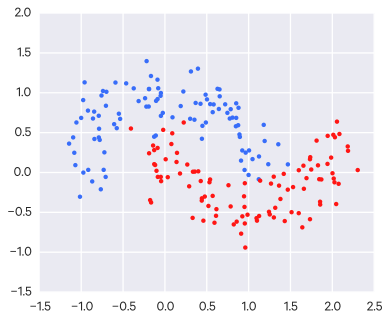

In [7]:
# The following are neural net graphics
# based on <https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb>
# and <http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/>
fig, ax = plt.subplots(1)
X, y = make_moons(n_samples=200, noise=0.2)
c = [palette[i*2] for i in y]
ax.scatter(X[:,0], X[:,1], c=c, linewidth=0)
fig.set_size_inches(6,5)

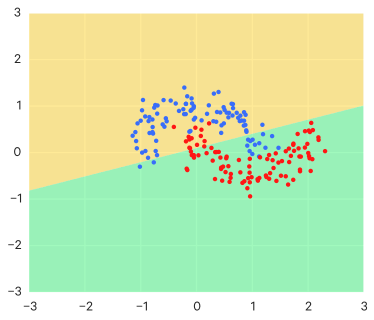

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

fig, ax = plt.subplots(1)
rng = np.arange(-3, 3, 0.01)
xs, ys = np.meshgrid(rng, rng)
Z = lr.predict(np.vstack([xs.ravel(), ys.ravel()]).T)
Z = Z.reshape(xs.shape)
ax.contourf(xs, ys, Z, levels=[0, 1], colors=(palette[1],palette[3],palette[1]), cmap=None, extend='both', alpha=0.6)
ax.scatter(X[:,0], X[:,1], c=c, linewidth=0)
ax.set_ylim([-3,3])
ax.set_xlim([-3,3])
fig.set_size_inches(6,5)

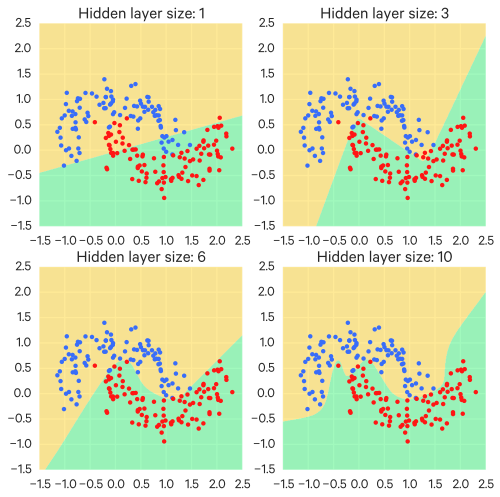

In [9]:
fig, axs = plt.subplots(2,2)
for h, ax in zip([1,3,6,10], axs.ravel()):
    nnet = neural_net.NeuralNet(hidden_dim=h)
    nnet.train(X, y, verbose=False)
    rng = np.arange(-3, 3, 0.01)
    xs, ys = np.meshgrid(rng, rng)
    Z = nnet.predict(np.vstack([xs.ravel(), ys.ravel()]).T)
    Z = Z.reshape(xs.shape)
    ax.contourf(xs, ys, Z, levels=[0, 1], colors=(palette[1],palette[3],palette[1]), cmap=None, extend='both', alpha=0.6)
    ax.scatter(X[:,0], X[:,1], c=c, linewidth=0)
    ax.set_ylim([-1.5,2.5])
    ax.set_xlim([-1.5,2.5])
    ax.set_title('Hidden layer size: {}'.format(h))
fig.set_size_inches(8,8)
save('layer_sizes')

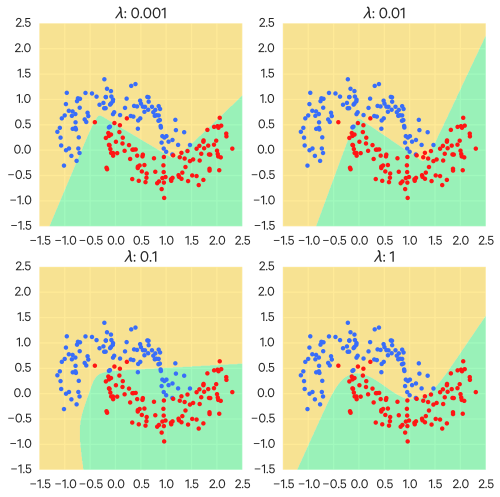

In [10]:
fig, axs = plt.subplots(2,2)
for h, ax in zip([0.001, 0.01, 0.1, 1], axs.ravel()):
    nnet = neural_net.NeuralNet(hidden_dim=3)
    nnet.train(X, y, verbose=False, lmbda=h)
    rng = np.arange(-3, 3, 0.01)
    xs, ys = np.meshgrid(rng, rng)
    Z = nnet.predict(np.vstack([xs.ravel(), ys.ravel()]).T)
    Z = Z.reshape(xs.shape)
    ax.contourf(xs, ys, Z, levels=[0, 1], colors=(palette[1],palette[3],palette[1]), cmap=None, extend='both', alpha=0.6)
    ax.scatter(X[:,0], X[:,1], c=c, linewidth=0)
    ax.set_ylim([-1.5,2.5])
    ax.set_xlim([-1.5,2.5])
    ax.set_title(r'$\lambda$: {}'.format(h))
fig.set_size_inches(8,8)
save('reg_strengths')